# <center>Data Science Training</center>
<center><b>Text preprocessing and Word Cloud</b><br></center>

## Import package

In [1]:
from wordcloud import WordCloud,STOPWORDS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk.data
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

## read input text file

In [2]:
df = pd.ExcelFile("C:/Users/liuleo/Documents/NLP/mcc_codes.xls")
df_mc = df.parse('mc')

In [3]:
df_mc.columns

Index([u'mcc', u'edited_description', u'combined_description',
       u'usda_description', u'irs_description', u'irs_reportable'],
      dtype='object')

In [4]:
text = ""
for x in df_mc['irs_description'].values:
    text = text + ' ' + str(x)

## Text preprocessing

#### tokenize text

#### remove non letters

In [ ]:
words = nltk.wordpunct_tokenize(re.sub('[^a-zA-Z]', ' ', text))

#### lower case

In [ ]:
words = [x.lower() for x in words]

#### remove stop words

In [ ]:
print(len(words))
words = [w for w in words if not w in stopwords.words("english")]
print(len(words))

#### Stemming vs Lemmatizing

<b>stemming</b> - process of reducing inflected (or sometimes derived) words to their word stem, base or root form <br>
<b>lemmatizing</b> - process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word’s lemma, or dictionary form<br>

In [ ]:
def bis_text_preprocessing(_words, method='lemm'):
    if method == 'lemm':
        wnl = WordNetLemmatizer()
        _words = [wnl.lemmatize(w) for w in _words]
    elif method == 'stem':
        port = PorterStemmer()
        _words = [port.stem(w) for w in _words]
    return _words

In [ ]:
words = bis_text_preprocessing(words, 'lemm')

#### change encoding if necessary

In [ ]:
words =  [x.decode('utf-8').encode('utf-8') for x in words]

## Text preprocessing in one fct

In [5]:
def text_preprocessing(_text, method='lemm'):
    
    # Tokenize and keep only english chars
    words = nltk.wordpunct_tokenize(re.sub('[^a-zA-Z]', ' ', _text))
    # Change to lower case
    words = [x.lower() for x in words]
    
    # remove stop words
    print(len(words))
    words = [w for w in words if not w in stopwords.words("english")]
    print(len(words))
    
    # Lemmatizing or stemming
    if method == 'lemm':
        wnl = WordNetLemmatizer()
        words = [wnl.lemmatize(w) for w in words]
    elif method == 'stem':
        port = PorterStemmer()
        words = [port.stem(w) for w in words]
    
    # Change Encoding if necessary
    words =  [x.decode('utf-8').encode('utf-8') for x in words]
    
    return words

In [6]:
words = text_preprocessing(text, 'lemm')

2688
2570


## Wordcloud

### Generate from list of text

In [7]:
text_wc = ' '.join(words)

In [11]:
wc_stopwords = set(STOPWORDS)
wc_stopwords.add('airline')
# optional, because we have already filter out stopwords in data preprocessing
wordcloud = WordCloud(stopwords=wc_stopwords, max_words=200, random_state=42).generate(text_wc) #stopwords=stopwords

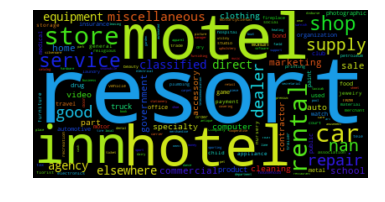

In [12]:
fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig("word1.png")

### Generate directly from text

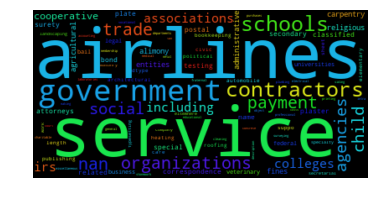

In [10]:
wc_stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=wc_stopwords, max_words=200, random_state=42).generate(re.sub('[^a-zA-Z]', ' ', str(df_mc['irs_description']).lower()).decode('utf-8').encode('utf-8'))
fig = plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig("word1.png")

## Have a look at other columns

In [11]:
edited_des = ""
for x in df_mc['edited_description'].values:
    edited_des = edited_des + ' ' + str(x)

In [12]:
words_edited_des = text_preprocessing(edited_des, 'lemm')

3066
2794


In [13]:
text_wc = ' '.join(words_edited_des)


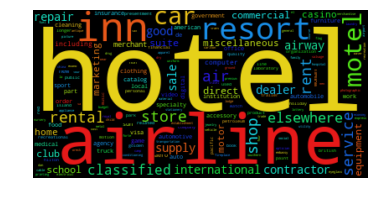

In [14]:
wc_stopwords = set(STOPWORDS) # optional, because we have already filter out stopwords in data preprocessing
wordcloud = WordCloud(stopwords=wc_stopwords, max_words=200, random_state=42).generate(text_wc) #stopwords=stopwords

fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig("word1.png")

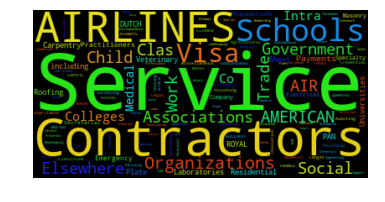

In [15]:
wc_stopwords = set(STOPWORDS) # optional, because we have already filter out stopwords in data preprocessing
wordcloud = WordCloud(stopwords=wc_stopwords, max_words=200, random_state=42).generate(str(df_mc['edited_description'])) #stopwords=stopwords

fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
fig.savefig("word1.png")